In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 165.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 178.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 169.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 139.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 141.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 160.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 167.8 MB/s eta 0:00:0000:01


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [3]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
6049,2009-01-01,Cobar,17.9,35.2,0.0,12.0,12.3,SSW,48.0,ENE,...,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,No,No
6050,2009-01-02,Cobar,18.4,28.9,0.0,14.8,13.0,S,37.0,SSE,...,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,No,No
6052,2009-01-04,Cobar,19.4,37.6,0.0,10.8,10.6,NNE,46.0,NNE,...,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,No,No
6053,2009-01-05,Cobar,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No,No
6054,2009-01-06,Cobar,24.2,41.0,0.0,11.2,8.4,WNW,35.0,NW,...,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,No,No


In [8]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,55.0,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,50.0,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,51.0,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,67.0,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,51.0,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No


In [9]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

In [10]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df.Date)

# Apply the function to the 'Date' column
df['Season'] = df['Date'].apply(date_to_season)

df=df.drop(columns=Date)
df

NameError: name 'Date' is not defined

In [11]:

X = df.drop(columns='Rainfall', axis=1)
y = df['Rainfall']

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainYesterday,RainToday,Season
64191,2009-01-01,MelbourneAirport,11.2,19.9,0.0,5.6,8.8,SW,69.0,W,...,37.0,1005.1,1006.4,7.0,7.0,15.9,18.1,No,Yes,Summer
64192,2009-01-02,MelbourneAirport,7.8,17.8,1.2,7.2,12.9,SSE,56.0,SW,...,43.0,1018.0,1019.3,6.0,7.0,12.5,15.8,Yes,No,Summer
64193,2009-01-03,MelbourneAirport,6.3,21.1,0.0,6.2,10.5,SSE,31.0,E,...,35.0,1020.8,1017.6,1.0,7.0,13.4,19.6,No,No,Summer
64194,2009-01-04,MelbourneAirport,8.1,29.2,0.0,6.4,12.5,SSE,35.0,NE,...,23.0,1016.2,1012.8,5.0,4.0,16.0,28.2,No,No,Summer
64195,2009-01-05,MelbourneAirport,9.7,29.0,0.0,7.4,12.3,SE,33.0,SW,...,31.0,1011.9,1010.3,6.0,2.0,19.4,27.1,No,No,Summer


In [13]:
y = (df['Rainfall'] > 0.0).astype(int)  # 1 = Rain, 0 = No Rain

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify= y, random_state=42)

In [14]:
y.value_counts()

Rainfall
0    4452
1    3105
Name: count, dtype: int64

In [15]:
# Select numeric feature column names
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Select categorical feature column names
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()


In [ ]:
# Scale the numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# One-hot encode the categoricals 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

In [ ]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

In [19]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

### Pipeline usage in crossvalidation
Recall that the pipeline is repeatedly used within the crossvalidation by fitting on each internal training fold and predicting on its corresponding validation fold


## Perform grid search cross-validation and fit the best model to the training data
### Select a cross-validation method, ensuring target stratification during validation


In [20]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

## Exercise 9. Instantiate and fit GridSearchCV to the pipeline
Complete the followng code:  
```python
grid_search = GridSearchCV(..., param_grid, cv=..., scoring='accuracy', verbose=2)  
grid_search.fit(..., ...)
```


In [21]:
# Drop one of the duplicate 'RainYesterday' columns
X_train = X_train.loc[:, ~X_train.columns.duplicated()]
X_test = X_test.loc[:, ~X_test.columns.duplicated()]

grid_search = GridSearchCV(estimator= pipeline, param_grid= param_grid, cv=cv, scoring='accuracy', verbose=2)  
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.2s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=50; total time=   1.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.4s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=   2.1s
[CV] END classifier__max_depth=None, classifier__min_samples_split=2, classifier__n_estimators=100; total time=

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['MinTemp',
                                                                          'MaxTemp',
                                                                          'Evaporation',
                                                                          'Sunshine',
                                                                          'WindGustSpeed',
                                                                          'WindSpeed9am',
                                                                          'WindSpeed3pm',
                                                                          'Humidity9am',
                                                                          'Humidity3pm',
                                                                          'Pressure9am',
                                                                          'Pressure3pm',...
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['Location',
                                                                          'WindGustDir',
                                                                          'WindDir9am',
                                                                          'WindDir3pm',
                                                                          'RainYesterday',
                                                                          'RainToday',
                                                                          'Season'])])),
                                       ('classifier',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'classifier__max_depth': [None, 10, 20],
                         'classifier__min_samples_split': [2, 5],
                         'classifier__n_estimators': [50, 100]},
             scoring='accuracy', verbose=2)

### Print the best parameters and best crossvalidation score


In [22]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))


Best parameters found:  {'classifier__max_depth': None, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 50}
Best cross-validation score: 0.84


## Exercise 10. Display your model's estimated score
Complete the followng code:  
```python
test_score = grid_search.score(..., ...)  
print("Test set score: {:.2f}".format(test_score))
```


In [23]:
test_score = grid_search.score(X_test, y_test)  
print("Test set score: {:.2f}".format(test_score))

Test set score: 0.84


So we have a reasonably accurate classifer, which is expected to correctly predict about 84% of the time whether it will rain today in the Melbourne area.  
But careful here. Let's take a deeper look at the results.

The best model is stored within the gridsearch object.


## Exercise 11. Get the model predictions from the grid search estimator on the unseen data
Complete the followng code:
```python
y_pred = grid_search.predict(...)
```


In [24]:
y_pred = grid_search.predict(X_test)

## Exercise 12. Print the classification report
Complete the followng code:
```python
print("\nClassification Report:")
print(...(y_test, y_pred))
```


In [25]:
print("\nClassification Report: ")
print(classification_report(y_test, y_pred))


Classification Report: 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       891
           1       0.91      0.68      0.78       621

    accuracy                           0.84      1512
   macro avg       0.86      0.82      0.83      1512
weighted avg       0.85      0.84      0.84      1512



## Exercise 13. Plot the confusion matrix 
Complete the followng code:
```python
conf_matrix = ...(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=...)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
```


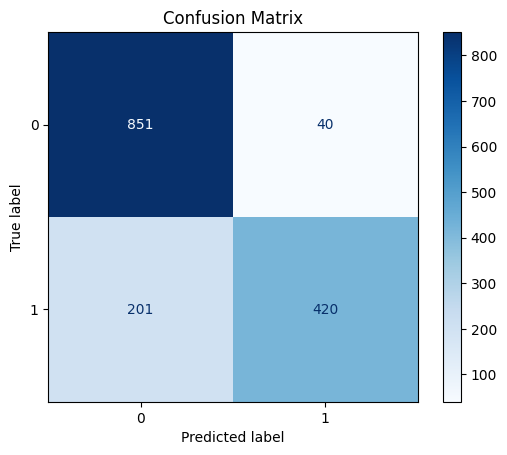

In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Let's consider wether the results indicate a good predictor of rainfall.
## Points to note - 2
What is the true positive rate? There will be a question on this in the assignment that follows.


<details><summary>Click here for Hints</summary>

Consider the confusion matrix or the classification report and claculate the true positve rate given the information.
    
</details> 


## Feature importances
Recall that to obtain the categorical feature importances, we have to work our way backward through the modelling pipeline to associate the feature importances with their original input variables, not the one-hot encoded ones. We don't need to do this for the numeric variables because we didn't modify their names in any way.  
Remember we went from categorical features to one-hot encoded features, using the 'cat' column transformer.
 
Let's get all of the feature importances and associate them with their transformed features


## Exercise 14. Extract the feature importances
Complete the followng code:
```python
feature_importances = grid_search.best_estimator_['classifier']. ...
```


In [27]:
feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

Now let's extract the feature importances and plot them as a bar graph.


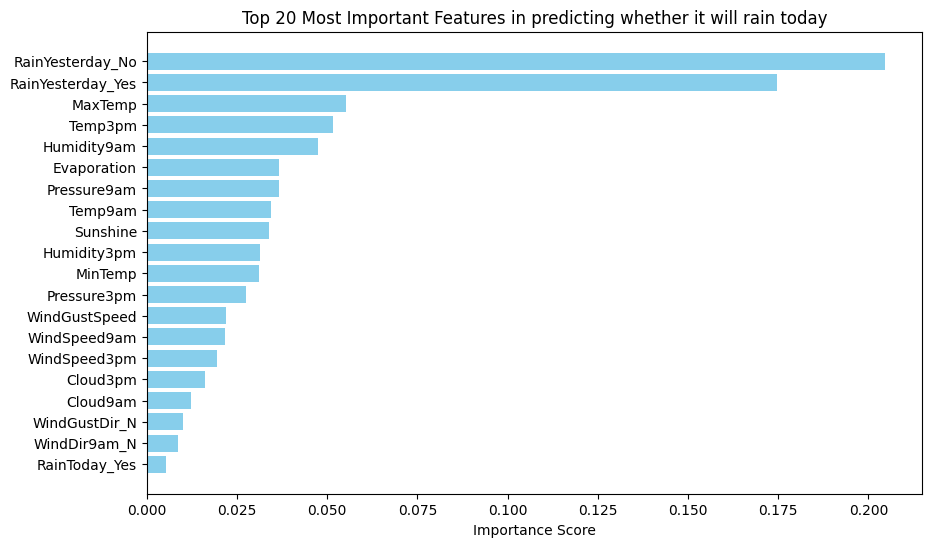

In [30]:
# Combine numeric and categorical feature names
feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

N = 20  # Change this number to display more or fewer features

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)
top_features = importance_df.head(N)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature on top
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

## Point to note - 3
Identify the most important feature for predicting whether it will rain based on the feature importance bar graph. There will be a question on this in the assignment that follows.


## Try another model
#### Some thoughts.
In practice you would want to try out different models and even revisit the data analysis to improve
your model's performance. Maybe you can engineer better features, drop irrelevant or redundant ones, project your data onto a dimensional feature space, or impute missing values to be able to use more data. You can also try a larger set of parameters to define you search grid, or even engineer new features using cluster analysis. You can even include the clustering algorithm's hyperparameters in your search grid!

With Scikit-learn's powerful pipeline and GridSearchCV classes, this is easy to do in a few steps.

## Exercise 15. Update the pipeline and the parameter grid
Let's update the pipeline and the parameter grid and train a Logistic Regression model and compare the performance of the two models. You'll need to replace the clasifier with LogisticRegression. We have supplied the parameter grid for you.

Complete the following code:
```python
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(...=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = ...

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = ...

# Fit the updated pipeline with LogisticRegression
model.fit(..., ...)

# Make predictions
y_pred = model.predict(X_test)

```


In [31]:
from sklearn.linear_model import LogisticRegression

# 1. Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(classifier=LogisticRegression(random_state=42))

# 2. Update the model's estimator in GridSearchCV
grid_search.estimator = pipeline

# 3. Define a new param_grid for Logistic Regression
param_grid = {
    'classifier__solver': ['liblinear'],  # liblinear supports L1 and L2 penalties
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced']
}

grid_search.param_grid = param_grid

# 4. Fit the updated pipeline with LogisticRegression
grid_search.fit(X_train, y_train)

# 5. Make predictions
y_pred = grid_search.predict(X_test)


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l1, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=None, classifier__penalty=l2, classifier__solver=liblinear; total time=   0.1s
[CV] END classifier__class_weight=No

###  Compare the results to your previous model.
Display the clasification report and the confusion matrix for the new model and compare your results with the previous model.


              precision    recall  f1-score   support

           0       0.81      0.95      0.87       891
           1       0.90      0.67      0.77       621

    accuracy                           0.84      1512
   macro avg       0.85      0.81      0.82      1512
weighted avg       0.85      0.84      0.83      1512



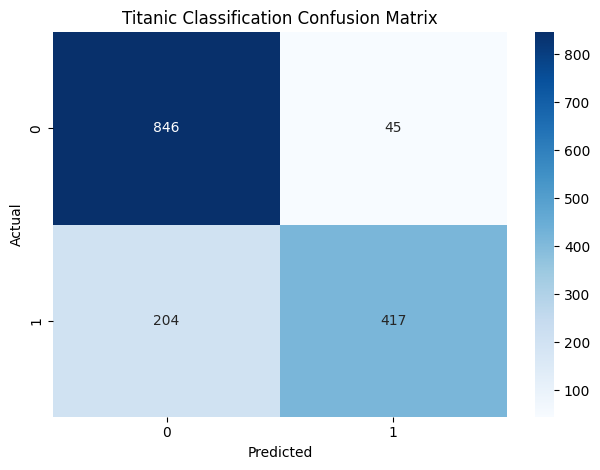

In [32]:
print(classification_report(y_test, y_pred))

# Generate the confusion matrix 
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

# Set the title and labels
plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Show the plot
plt.tight_layout()
plt.show()

What can you conclude about the model performances? 


## Points to note - 4
Compare the accuracy and true positive rate of rainfall predictions between the LogisticRegression model and the RandomForestClassifier model.

**Note: Make sure to provide the answer in the form of a list using either bullets or numbers.**

There will be a question on this in the assignment that follows.


<details><summary>Click here for Hints</summary>
        
   Compare the accuracy percentages of both the classifiers.
   
   Provide the details of the number of correct predictions.
   
   Provide the true positive rate of LogisticRegression Classifier.
    
    
</details>



### Congratulations! You've made it the end of your final project! 
Well done! You now have some great tools to use for tackling complex real-world problems with machine learning.

## Author

<a href="https://www.linkedin.com/in/jpgrossman/" target="_blank">Jeff Grossman</a>

### Other Contributor(s)

<a href="https://www.linkedin.com/in/abhishek-gagneja-23051987/" taget="_blank">Abhishek Gagneja</a>

<!-- ## Changelog

| Date | Version | Changed by | Change Description |
|:------------|:------|:------------------|:---------------------------------------|
| 2024-11-26 | 0.1  | Jeff Grossman    | Create lab |

 -->
<h3 align="center"> © IBM Corporation. All rights reserved. <h3/>
